In [1]:
using Interpolations

Sea Level Part Throttle Data (Fig. 3-21 Left)

We need to build:
- A 2D table providing $\tilde{P}_{std}(n,MAP)$
- A 1D table providing $MAP_{std,min}(n)$
- A 1D table providing $MAP_{std,max}(n)$

Then, to compute $\tilde{P}_{std}(n,MAP)$:
- Find $MAP_{lim} = min\left\{max \left\{MAP_{std,min}(n), MAP\right\}, MAP_{std,max} \right\}$
- Find $\tilde{P}_{std}(n,MAP_lim)$

1×11 Matrix{Float64}:
 25.0  25.55  26.15  26.88  27.3  28.1  28.75  28.7  28.65  28.6  28.6

For $\tilde{P}_{std}(n,MAP)$, we have only two values for each $n$: one at $MAP_{std, min}(n)$, another at $MAP_{std,max}(n)$. From the graph we see that variation is linear between them.

For a 2D table we need these two $MAP$ values to be the same across all values of $n$. So for each $n$, using the MAP and right limits in the graph, we construct a linear interpolator, then use it to resample $\tilde{P}$ at two arbitrary $MAP$ values (but equal for all $n$), then build the 2D interpolator.

For $n > 2700$, if we were to simply extrapolate the values in the graph, power would increase indefinitely with engine speed, which we know is not realistic. Instead, we add two extra $n$ points at 2800 and 2900 RPM, with power reaching a peak at 2700-2800 RPM, then decreasing at 2900 RPM, both for MAP_std_min and MAP_std_max. MAP_std_min and MAP_std_max for these RPM values are simply extrapolations. 

In [58]:
n = [1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900] |> vec |> Vector{Float64}
MAP_std_min = fill!(similar(n), 17)
P̃_std_min = [54 61 67 72 76 81 85 90 94.1 99.5 99.5 94.1] |> vec
MAP_std_max = [25 25.55 26.15 26.88 27.3 28.1 28.75 28.7 28.65 28.6 28.55 28.50] |> vec |> Vector{Float64}
P̃_std_max = [97.8 109.5 121.8 136 145.75 162 176 184 193 200 200 193] |> vec

n_samples = n
MAP_samples = [17.0, 30.0]
P̃_std_samples = Array{Float64,2}(undef, (length(n), 2))

for (i, n) in enumerate(n_samples)
    interp = LinearInterpolation(
        [MAP_std_min[i], MAP_std_max[i]],
        [P̃_std_min[i],P̃_std_max[i]],
        extrapolation_bc = Line())
        for (j, MAP) in enumerate(MAP_samples)
            P̃_samples[i,j] = interp(MAP_samples[j])
            P̃_samples[i,j] = interp(MAP_samples[j])
        end
end

interp_P̃_std = LinearInterpolation((n_samples, MAP_samples),P̃_samples, extrapolation_bc = Line())
interp_MAP_std_min = LinearInterpolation(n, MAP_std_min, extrapolation_bc = Line())
interp_MAP_std_max = LinearInterpolation(n, MAP_std_max, extrapolation_bc = Line())


12-element extrapolate(interpolate((::Vector{Float64},), ::Vector{Float64}, Gridded(Linear())), Line()) with element type Float64:
 25.0
 25.55
 26.15
 26.88
 27.3
 28.1
 28.75
 28.7
 28.65
 28.6
 28.55
 28.5

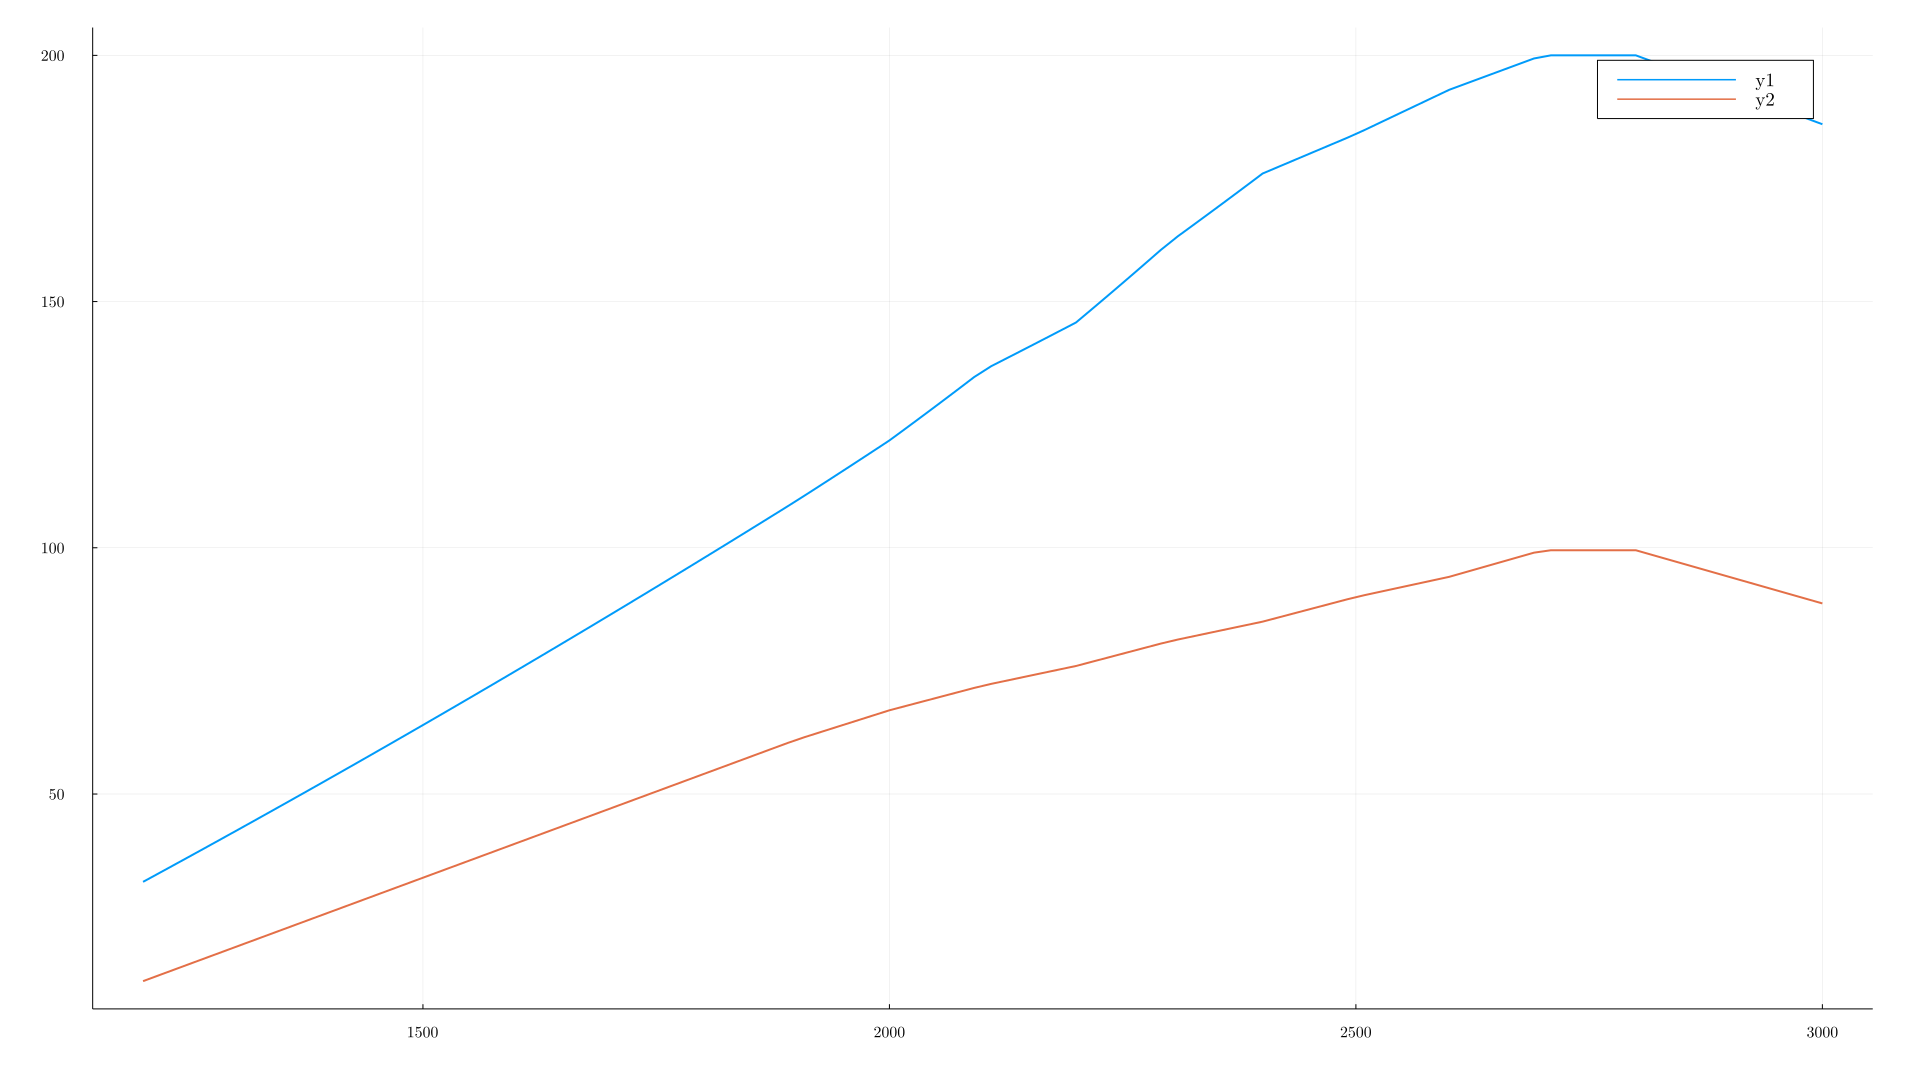

In [59]:
#plot minimum and maximum sea level power across RPM
using Plots
n_plot = range(1200, 3000, length = 100)
P_max = Vector{Float64}(undef, length(n_range))
P_min = similar(P_max)
for (i, n) in enumerate(n_plot)
    P_max[i] = interp_P̃_std(n, interp_MAP_std_max(n))
    P_min[i] = interp_P̃_std(n, interp_MAP_std_min(n))
end
plot(n_range, P_max)
plot!(n_range, P_min)

Full Throttle Data (Fig. 3-21, Right)

Need:
- 2D table h_full(n, MAP)
- 2D table P_full(n, h_full)
- Optionally, 2D table

Necesito MAP_full(n, h) para poder calcular MAP = MAP_min
Parac

Yo necesito P(n, MAP). Lo que hago es: con n y la MAP dada, entro en la tabla p_full(n, MAP) para determinar la presion a la que esa MAP es MAP_full. Despues, con n y esa p_full, entro en la otra tabla P_full(n, p_full).


Tambien podria construirme directamente una tabla 2D P_full(n, MAP). Para eso tendria que hacer lo siguiente:
Para cada n:
- Cojo (h = 0, P_full(h=0)) y (h = 23k, P_full(h=23k)) de la tabla, y los uso para construirme un interpolador P_full(h) (esto puedo hacerlo solo con dos puntos porque P_full es lineal con h)
- Cojo la lista de valores de h y de MAP_full para esa n y construyo un interpolador lineal h(MAP_full)
- Evaluo ambos interpoladores en una serie de length_h altitudes prefijadas entre 0 y 23k
- Guardo los valores de MAP_full(n, h) y P_full(n,h) obtenidos en la fila correspondiente a n de un array 2D length_n x length_h
- Con MAP

Para cada MAP

In [ ]:
kk